# Sunny Nurseries Iris Plant Stock

"Sunny Nurseries" have had a customer inquiry about their Iris plants that they sell. The customer wishes to know how what is the average size of petals on the three different species that "Sunny Nurseries" sells.

I have had the task to find out from a sample population to find out the size orders from large to small. 
I will do an analysis of the data provided and present my findings to the customer.

In [44]:
# I will import the dataset and import relevant packages to help with my research
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns 
from scipy.stats import norm,t
from statsmodels.formula.api import ols

df_iris = pd.read_csv('..\StatistiskaMetoder\data\iris.csv') # dataset

In [45]:
# Showing the top 3 lines of the dataframe
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [46]:
# Here is what information is provided in the data set
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal_length   150 non-null    float64
 1    sepal_width   150 non-null    float64
 2    petal_length  150 non-null    float64
 3    petal_width   150 non-null    float64
 4    class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [47]:
# This shows the unique elements of the column class
df_iris[' class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We can see here that there is 5 different columns containing information of the type(class), sepal length, sepal width, petal length and petal width. There are 150 rows of data.

I will now divide the data set into the relevant 3 species and calculate an extra column that will give the area of each petal.

This will enable me to do further research into the different sizes of petals for the customer.

In [48]:
# I will multiply the petal length by the petal width to get an
# area of the petal.

df_iris = df_iris.rename(columns={' petal_length': 'petal_length', ' petal_width': 'petal_width'}) # Fixing space before column names

df_iris["petal_area"] = df_iris["petal_length"] * df_iris["petal_width"]
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class,petal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,0.28


In [49]:
# Now I will separate so that the 3 types have a separate table each.

df_setosa = df_iris[df_iris[' class'] == 'Iris-setosa'].reset_index(drop=True)
df_versicolor = df_iris[df_iris[' class'] == 'Iris-versicolor'].reset_index(drop=True)
df_virginica = df_iris[df_iris[' class'] == 'Iris-virginica'].reset_index(drop=True)

# we can tell that each data set has a total of 50 of the 3 different types of Iris flowers
# This is good as it is equal sample sets for each type


In [50]:
# Here is an example of what the virginica datadramwe looks like
df_virginica.head(3)


,sepal_length,sepal_width,petal_length,petal_width,class,petal_area
0,6.3,3.3,6.0,2.5,Iris-virginica,15.00
1,5.8,2.7,5.1,1.9,Iris-virginica,9.69
2,7.1,3.0,5.9,2.1,Iris-virginica,12.39


Now that I have arranged the data to 3 different samples with the respected species of Iris. The next step is to see what is the averages of the area of petal so the customer can get an idea of what sizes the petals can be. 

In [51]:
# getting the mean and median of the length of stem(sepal) for each Iris type
setosa_petal_area_mean = df_setosa["petal_area"].mean().round(2)
setosa_petal_area_median = df_setosa["petal_area"].median().round(2)
setosa_petal_area_stan_dev = np.std(df_setosa["petal_area"],ddof=1).round(2)
print(f"The Setosa Iris petal area has a mean of {setosa_petal_area_mean}, median of {setosa_petal_area_median} and a Standard deviation of {setosa_petal_area_stan_dev}")

versicolor_petal_area_mean = df_versicolor["petal_area"].mean().round(2)
versicolor_petal_area_median = df_versicolor["petal_area"].median().round(2)
versicolor_petal_area_stan_dev = np.std(df_versicolor["petal_area"],ddof=1).round(2) # ddof means that it is a sample standard deviation
print(f"The Versicolor Iris petal area has a mean of {versicolor_petal_area_mean}, median of {versicolor_petal_area_median} and Standard deviation of {versicolor_petal_area_stan_dev}")

virginica_petal_area_mean = df_virginica["petal_area"].mean().round(2)
virginica_petal_area_median = df_virginica["petal_area"].median().round(2)
virginica_petal_area_stan_dev = np.std(df_virginica["petal_area"],ddof=1).round(2)
print(f"The Virginica Iris petal area has a mean {virginica_petal_area_mean}, median {virginica_petal_area_median} and a Standard deviation of {virginica_petal_area_stan_dev}")


The Setosa Iris petal area has a mean of 0.36, median of 0.3 and a Standard deviation of 0.18
The Versicolor Iris petal area has a mean of 5.72, median of 5.62 and Standard deviation of 1.37
The Virginica Iris petal area has a mean 11.3, median 11.44 and a Standard deviation of 2.16


Based from this information I can see that the Virginica species on average has the largest petals and the Setosa species on average has the smallest petals. I however wish to visualise how the different averages are and to see how accurate the mean is compared to the normal distribution of each sample set. I also want to see how the data is spread, so I can see how accurate the averages are.   

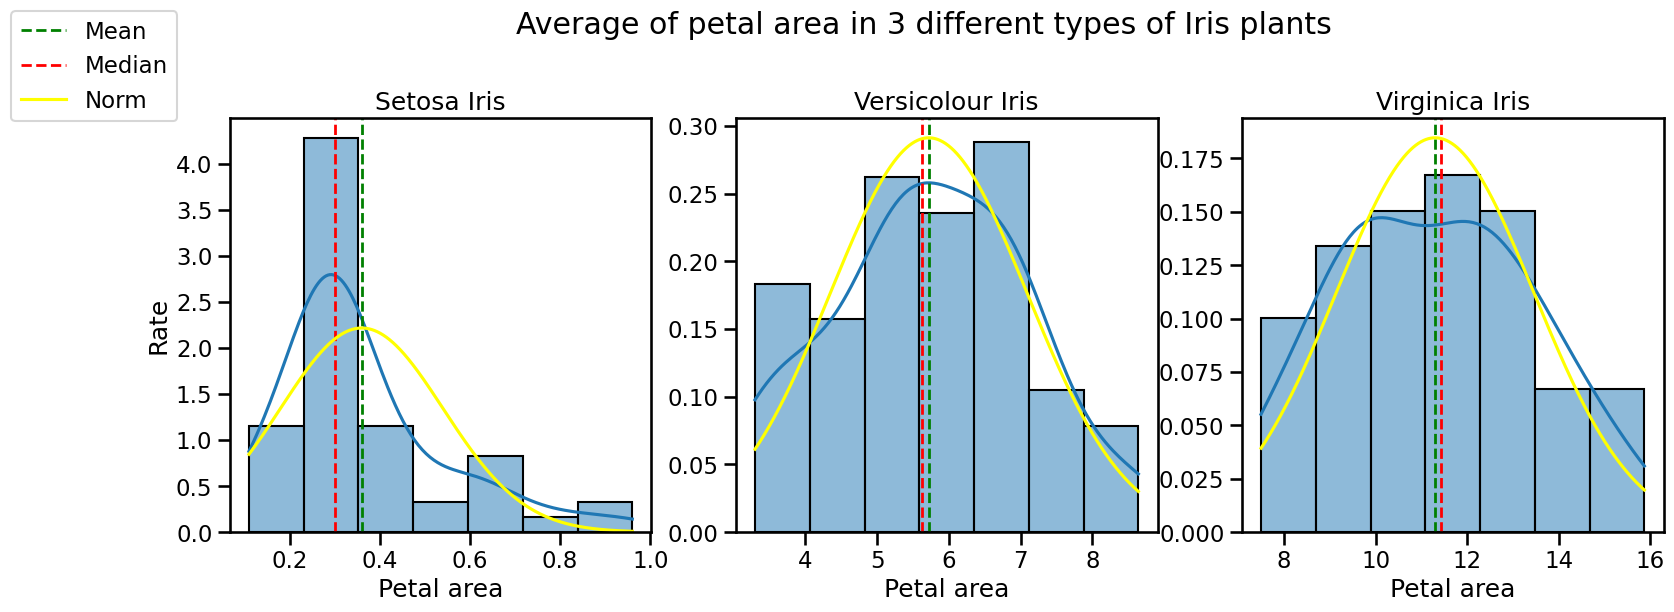

In [52]:
# plot on 3 different graphs median and mean of the petal area of each different varieties of Iris

fig, ax = plt.subplots(1,3, figsize= (18.5,6))
bins = 7

# setosa plot
sns.histplot(ax = ax[0], x = "petal_area", data=df_setosa, stat="density", kde=True,bins=bins)
sns.set_context("talk")
fig.subplots_adjust(top=.8)
fig.suptitle('Average of petal area in 3 different types of Iris plants')

ax[0].set(title="Setosa Iris", xlabel= "Petal area", ylabel= "Rate")
ax[0].axvline(setosa_petal_area_mean, color="green", linestyle="--", linewidth=2, label="Mean")
ax[0].axvline(setosa_petal_area_median, color="red", linestyle="--", linewidth=2, label="Median")

setosa_x = np.linspace(0.11, 0.96, 1000)
setosa_y = norm.pdf(x= setosa_x , loc=setosa_petal_area_mean, scale=setosa_petal_area_stan_dev)
ax[0].plot(setosa_x,setosa_y, color="yellow", label="Norm")

# versicolor plot
sns.histplot(ax = ax[1], x= "petal_area", data=df_versicolor,stat="density", kde=True, bins=bins)
ax[1].set(title="Versicolour Iris", xlabel="Petal area", ylabel=None)
ax[1].axvline(versicolor_petal_area_mean, color="green", linestyle="--", linewidth=2)
ax[1].axvline(versicolor_petal_area_median, color="red", linestyle="--", linewidth=2)

versicolor_x = np.linspace(3.3, 8.64, 1000)
versicolor_y = norm.pdf(x= versicolor_x , loc=versicolor_petal_area_mean, scale=versicolor_petal_area_stan_dev)
ax[1].plot(versicolor_x,versicolor_y, color="yellow")

# virginica plot
sns.histplot(ax = ax[2], x= "petal_area", data=df_virginica, stat="density",kde=True, bins=bins)
ax[2].set(title="Virginica Iris", xlabel="Petal area", ylabel=None)
ax[2].axvline(virginica_petal_area_mean, color="green", linestyle="--", linewidth=2)
ax[2].axvline(virginica_petal_area_median, color="red", linestyle="--", linewidth=2)

virginica_x = np.linspace(7.5, 15.87, 1000)
virginica_y = norm.pdf(x= virginica_x , loc=virginica_petal_area_mean, scale=virginica_petal_area_stan_dev)
ax[2].plot(virginica_x,virginica_y, color="yellow")

fig.legend(loc="upper left")
plt.show()

This has given some very interesting results. It shows that the Setosa Iris mode average is very focused on one area size. The other two Iris plants have very spread out mode average results. I can therefore inform the customer that the Setosa plants petals are more likely to be close that particular size. This may be useful as they may want all the petals to be of similar size.
The Versicolor variety seemed to have a very  spread rate of mode. However the other averages were not as close to the rate mode average. This may show that the plant may not be very constant in its size of petals. 
The Virginica plants averages seemed very consistent in showing that that area was the most occurring in all types of average testing. This means that it is also fairly consistent in the area size of the petals. 

I presented these results to the customer. However they would like to know how certain I am of these results as the information come from a sample. They wish to know if these results would be representative of the whole population of the nursery.

I will check the confidence of my results so that I can show the customer the margin of error. It is good to let them know this as we have only measured a point of estimate with the averages from the sample population. 

In [53]:
# With this information of the different averages i will now check if how certain i am with that the normaldistribution can be a good
# estimate for the whole population of the Stem lengths of the different species of Iris plants

# Setosa confidence interval of 95%

alpha = 0.05 # This is the significance grade i want to study

setosa_data_total = len(df_setosa["petal_area"]) # length of data set
setosa_petal_area_sem = scs.sem(df_setosa["petal_area"]) # Counts standard error mean  

lower_setosa_petal_area, upper_setosa_petal_area = t.interval(confidence=1-alpha, df=setosa_data_total-1, loc=setosa_petal_area_mean, scale=setosa_petal_area_sem)

print(f"Confidence interval (\u03B1=0.05) for average petal area of \"Setosa\" Iris: {round(lower_setosa_petal_area,1)} - {round(upper_setosa_petal_area,1)} with a mean average of : {setosa_petal_area_mean}")

# Versicolor confidence interval of 95%

versicolor_data_total = len(df_versicolor["petal_area"]) # length of data set
versicolor_petal_area_sem = scs.sem(df_versicolor["petal_area"]) # Counts standard error mean  

lower_versicolor_petal_area, upper_versicolor_petal_area = t.interval(confidence=1-alpha, df=versicolor_data_total-1, loc=versicolor_petal_area_mean, scale=versicolor_petal_area_sem)

print(f"Confidence interval (\u03B1=0.05) for average petal area of \"Versicolor\" Iris: {round(lower_versicolor_petal_area,1)} - {round(upper_versicolor_petal_area,1)} with a mean average of : {versicolor_petal_area_mean}")

# Virginica confidence interval of 95 %

virginica_data_total = len(df_virginica["petal_area"]) # length of data set
virginica_petal_area_sem = scs.sem(df_virginica["petal_area"]) # Counts standard error mean  

lower_virginica_petal_area, upper_virginica_petal_area = t.interval(confidence=1-alpha, df=virginica_data_total-1, loc=virginica_petal_area_mean, scale=virginica_petal_area_sem)

print(f"Confidence interval (\u03B1=0.05) for average petal area of \"Virginica\" Iris: {round(lower_virginica_petal_area,1)} - {round(upper_virginica_petal_area,1)} with a mean average of : {virginica_petal_area_mean}") 

Confidence interval (α=0.05) for average petal area of "Setosa" Iris: 0.3 - 0.4 with a mean average of : 0.36
Confidence interval (α=0.05) for average petal area of "Versicolor" Iris: 5.3 - 6.1 with a mean average of : 5.72
Confidence interval (α=0.05) for average petal area of "Virginica" Iris: 10.7 - 11.9 with a mean average of : 11.3


After looking at the results of each confidence interval at a rate of 95 % I can assure the customer that we can be fairly certain that the sample is relatively accurate. The Virginica 

## Finding a correlation

The customer was very happy with the results that I gave them. However they would like to know more about the form of the petals. They know that The Virginica has the largest petals and the Setosa has the smallest, but how are they formed and how does the length compare to the width of the petal?
Will the petals be wider the longer they are for example?

I will investigate this by using correlation and regression techniques.  


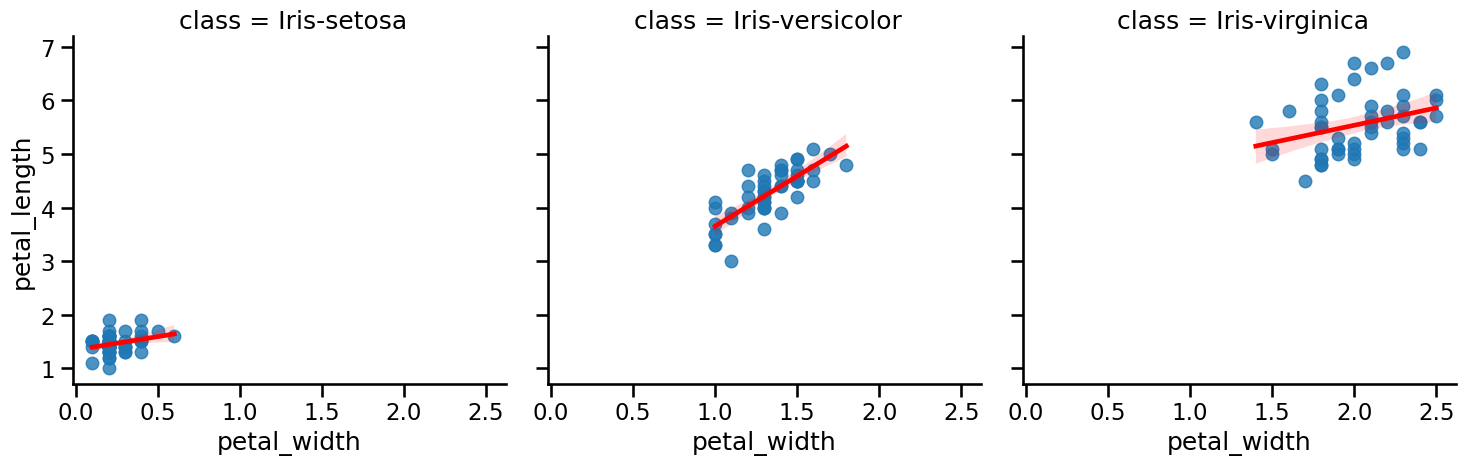

In [108]:
# plotting all the Varieties side by side.
sns.lmplot(data=df_iris, x="petal_width", y="petal_length", col=" class", line_kws={'color': 'red'},col_wrap=3)

Here you can clearly see that each variety has different sizes of petal leaves due to the scale on the graph. It also shows that the Iris petals are small in length and thin in width. While the other two are slightly longer and wider. But overall the anatomy of the Iris plants petals seem to be longer and thin. I will analyze the varieties individually to further my findings.

### Setosa Iris

In [111]:
# Producing an ols regression report of petal length and width of the Setosa
model = ols('petal_length ~ petal_width', data=df_setosa).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     4.970
Date:                Thu, 02 Feb 2023   Prob (F-statistic):             0.0305
Time:                        16:17:49   Log-Likelihood:                 19.597
No. Observations:                  50   AIC:                            -35.19
Df Residuals:                      48   BIC:                            -31.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.3430      0.059     22.698      

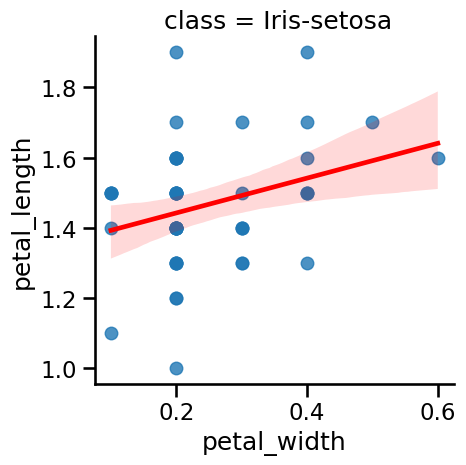

In [112]:
sns.lmplot(data=df_setosa, x="petal_width", y="petal_length",line_kws={'color': 'red'},col=" class")

Here we have a closer view of how the data is spread out in the setosa Iris.

We can tell from the graph that the plot points are rather spread from the linear regression. This is further proved by the R square result in the regression test. This value is at 0.094, which means that the linear regression is not very reliable. If it were closer to the value of 1 then it would be more reliable.
I will have to inform the customer that. If i was able to have more data in my sample then maybe I could of had a more reliable result.

The intercept shows us that the linear regression begins from 1.340. This is not unusual as the data being analyzed is a plant and that would not be possible if the regression began at 0. 

So I can conclude to the customer that it seems that the Setosa does have a positive linear regression. Thus meaning that the longer the petal are the wider they will be. The petals still are rather thin in comparison to the length. But due to the poor R square result, I can not guarantee that this is always the case. 